<a href="https://colab.research.google.com/github/ab2gbl/Master2/blob/main/MLCI/TP/MLCI_TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

data = np.array([
    [1, 0],
    [1, 1],
    [0, 1],
    [0, 0]
])
labels = np.array([0, 1, 0, 0])


weights = np.append(np.random.uniform(-1, 1, 2), 0)


learning_rate = 0.1
epochs = 300000

print(weights)


[0.74248596 0.00366644 0.        ]


# New



In [ ]:
def weighted_sum(inputs):
  inputs_with_bias = np.append(inputs, 1)
  return np.dot(inputs_with_bias, weights)    # sum input*weight

weighted_sum([1,0])


-5.2474851817963675

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:


def calculate_error(prediction, target):
    return prediction - target

def MSE(predictions, targets):
    errors = calculate_error(predictions, targets)
    squared_errors = errors ** 2
    mse = np.mean(squared_errors)  # average
    return mse





In [ ]:

def calculate_gradient(error, prediction):
    gradient = error * prediction * (1 - prediction)
    return gradient


In [ ]:

def adjust_weights(inputs, gradient):
    global weights
    inputs_with_bias = np.append(inputs, 1)
    weights += learning_rate * gradient * inputs_with_bias


In [ ]:
mse_values = []  # To store MSE values for each epoch

for epoch in range(epochs):
    predictions = []

    # Loop over each sample
    for i in range(len(data)):
        inputs = data[i]
        target = labels[i]

        # Make a prediction
        w_sum = weighted_sum(inputs)
        prediction = sigmoid(w_sum)
        predictions.append(prediction)

        # Calculate error (target - prediction)
        error =calculate_error (target , prediction)

        # Adjust weights (gradient descent)
        gradiant=calculate_gradient(error,prediction)
        adjust_weights(inputs,gradiant)

    # Calculate MSE for this epoch and add to the list
    mse = MSE(predictions, labels)
    mse_values.append(mse)

    # Print MSE every 50,000 epochs for tracking
    if epoch % 50000 == 0:
        print(f"Epoch {epoch}, MSE: {mse}")


Epoch 0, MSE: 0.3563782866980681
Epoch 50000, MSE: 0.00046931347084700246
Epoch 100000, MSE: 0.00022793433789261932
Epoch 150000, MSE: 0.00015000068590181434
Epoch 200000, MSE: 0.00011163453155349998
Epoch 250000, MSE: 8.883804707406704e-05


# Old

In [ ]:
# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Prediction function
def predict(inputs):
    # Adding bias as the third input (1)
    inputs_with_bias = np.append(inputs, 1)
    # Weighted sum
    weighted_sum = np.dot(inputs_with_bias, weights)
    # Apply activation function
    return sigmoid(weighted_sum)

# Function to calculate the Mean Squared Error (MSE)
def calculate_mse(predictions, labels):
    errors = predictions - labels
    mse = np.mean(errors ** 2)
    return mse
mse_values = []  # To store MSE values for each epoch

for epoch in range(epochs):
    predictions = []

    # Loop over each sample
    for i in range(len(data)):
        inputs = data[i]
        target = labels[i]

        # Make a prediction
        prediction = predict(inputs)
        predictions.append(prediction)

        # Calculate error (target - prediction)
        error = target - prediction

        # Adjust weights (gradient descent)
        inputs_with_bias = np.append(inputs, 1)
        weights += learning_rate * error * prediction * (1 - prediction) * inputs_with_bias

    # Calculate MSE for this epoch and add to the list
    mse = calculate_mse(np.array(predictions), labels)
    mse_values.append(mse)

    # Print MSE every 50,000 epochs for tracking
    if epoch % 50000 == 0:
        print(f"Epoch {epoch}, MSE: {mse}")


Epoch 0, MSE: 0.2731089669695103
Epoch 50000, MSE: 0.00046969285601942517
Epoch 100000, MSE: 0.0002280251968414588
Epoch 150000, MSE: 0.0001500402956011995
Epoch 200000, MSE: 0.00011165655602394491
Epoch 250000, MSE: 8.885203184249008e-05


# test

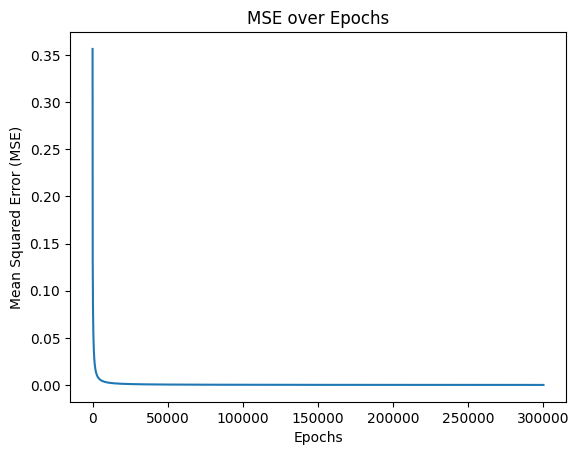

In [ ]:
plt.plot(mse_values)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE over Epochs')
plt.show()


In [ ]:
# Test cases
test_data = np.array([
    [0, 1],
    [1, 1]
])

print("Predictions after training:")
for i, test_case in enumerate(test_data):

    w_sum = weighted_sum(test_case)
    prediction = sigmoid(w_sum)
    print(f"Test Case {i+1} (X1={test_case[0]}, X2={test_case[1]}): Prediction = {round(prediction)} ({prediction:.4f})")


Predictions after training:
Test Case 1 (X1=0, X2=1): Prediction = 0 (0.0093)
Test Case 2 (X1=1, X2=1): Prediction = 1 (0.9890)
